In [50]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , export_graphviz 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
import imageio


In [51]:
data= pd.read_excel("bank.xlsx")

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [53]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [54]:
train , test = train_test_split(data, test_size=0.15)

In [55]:
red_blue=["#19B5FE","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [56]:
pos_age = data[data["y"] == "yes"]["age"]
neg_age = data[data["y"] == "no"]["age"]

pos_balance = data[data["y"] == "yes"]["balance"]
neg_balance = data[data["y"] == "no"]["balance"]

pos_day = data[data["y"] == "yes"]["day"]
neg_day = data[data["y"] == "no"]["day"]


pos_duration = data[data["y"] == "yes"]["duration"]
neg_duration= data[data["y"] == "no"]["duration"]


pos_compaign = data[data["y"] == "yes"]["campaign"]
neg_compaign = data[data["y"] == "no"]["campaign"]

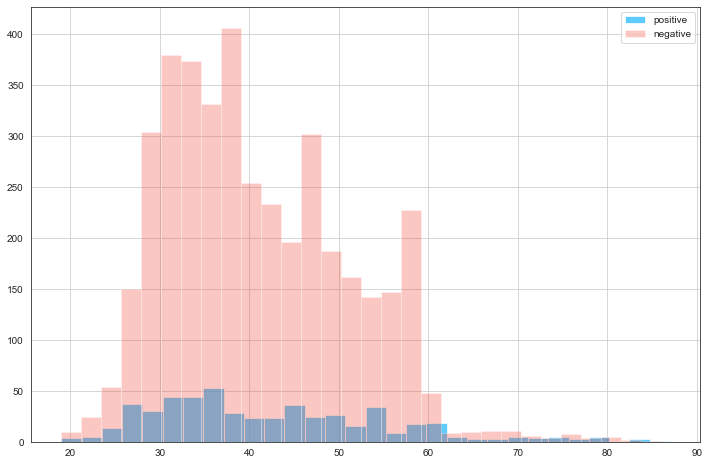

In [57]:
fig = plt.figure(figsize =(12,8))
plt.title = ("titre 1")
pos_age.hist(alpha= 0.7 ,bins = 30, label="positive")
neg_age.hist(alpha= 0.3 ,bins = 30, label="negative")
plt.legend(loc = "upper right")

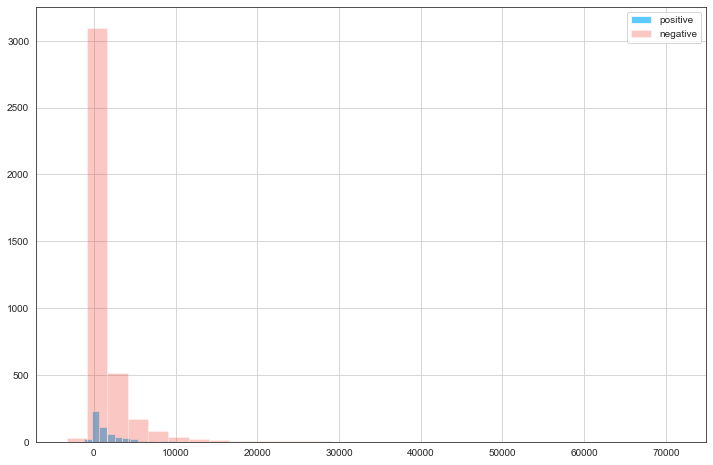

In [58]:
fig = plt.figure(figsize =(12,8))
plt.title = ("titre 1")
pos_balance.hist(alpha= 0.7 ,bins = 30, label="positive")
neg_balance.hist(alpha= 0.3 ,bins = 30, label="negative")
plt.legend(loc = "upper right")

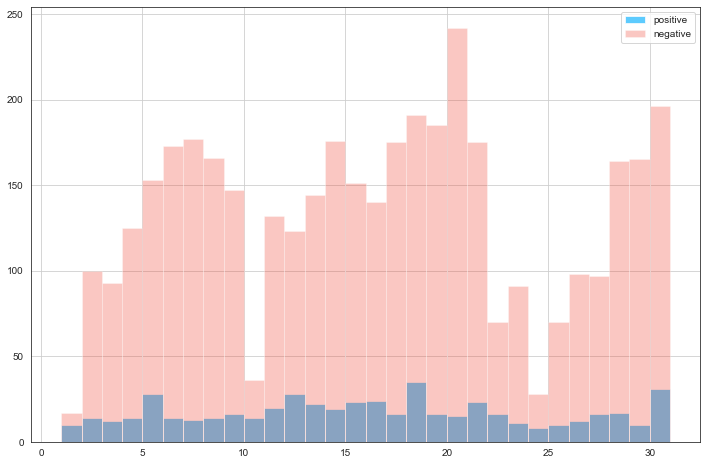

In [59]:
fig = plt.figure(figsize =(12,8))
plt.title = ("titre 1")
pos_day.hist(alpha= 0.7 ,bins = 30, label="positive")
neg_day.hist(alpha= 0.3 ,bins = 30, label="negative")
plt.legend(loc = "upper right")

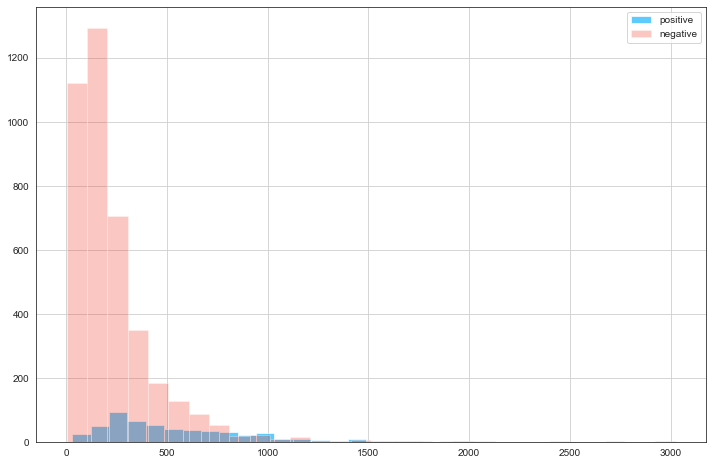

In [60]:
fig = plt.figure(figsize =(12,8))
plt.title = ("titre 1")
pos_duration.hist(alpha= 0.7 ,bins = 30, label="positive")
neg_duration.hist(alpha= 0.3 ,bins = 30, label="negative")
plt.legend(loc = "upper right")

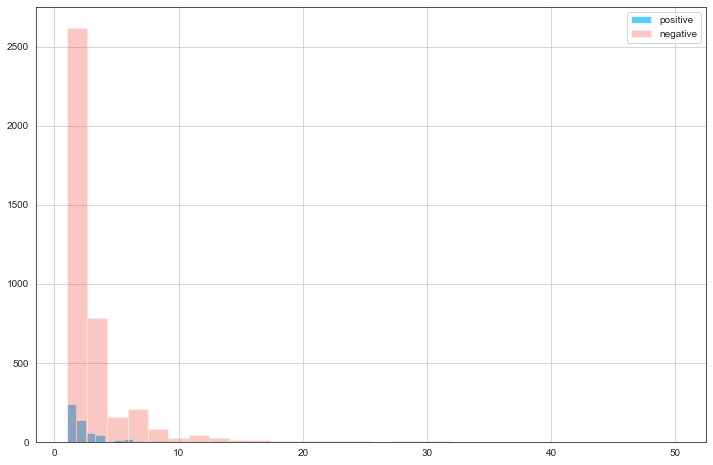

In [61]:
fig = plt.figure(figsize =(12,8))
plt.title = ("titre 1")
pos_compaign.hist(alpha= 0.7 ,bins = 30, label="positive")
neg_compaign.hist(alpha= 0.3 ,bins = 30, label="negative")
plt.legend(loc = "upper right")

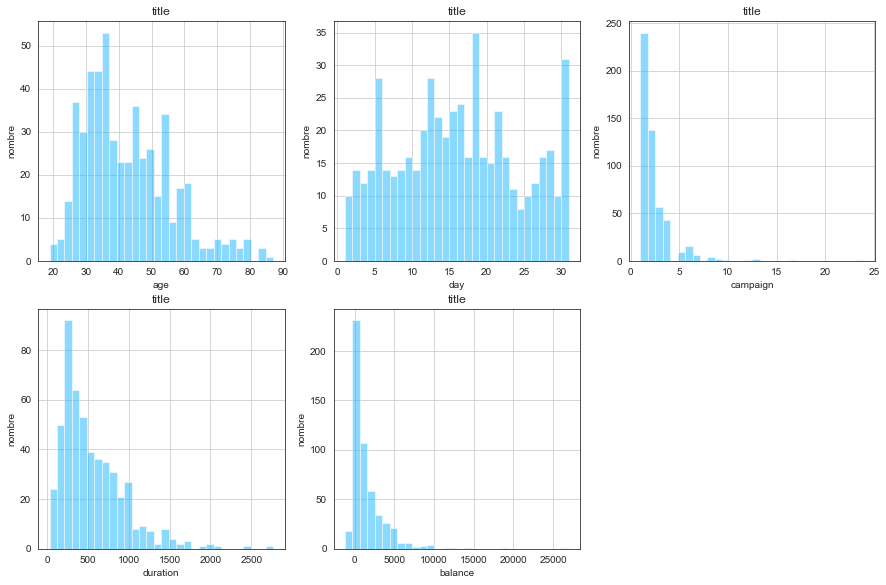

In [62]:
fig2 = plt.figure(figsize=(15,15))
ax3=fig2.add_subplot(331)
ax3.set_xlabel("age")
ax3.set_ylabel("nombre")
ax3.set_title("title")
pos_age.hist(alpha=0.5, bins=30)

ax4=fig2.add_subplot(332)
ax4.set_xlabel("day")
ax4.set_ylabel("nombre")
ax4.set_title("title")
pos_day.hist(alpha=0.5, bins=30)

ax5=fig2.add_subplot(333)
ax5.set_xlabel("campaign")
ax5.set_ylabel("nombre")
ax5.set_title("title")
pos_compaign.hist(alpha=0.5, bins=30)

ax6=fig2.add_subplot(334)
ax6.set_xlabel("duration")
ax6.set_ylabel("nombre")
ax6.set_title("title")
pos_duration.hist(alpha=0.5, bins=30)

ax7=fig2.add_subplot(335)
ax7.set_xlabel("balance")
ax7.set_ylabel("nombre")
ax7.set_title("title")
pos_balance.hist(alpha=0.5, bins=30)


In [63]:
c=DecisionTreeClassifier(min_samples_split= 500, max_depth=3) 

In [64]:
features=["age","balance","day","duration","campaign","pdays","previous"]
X_train= train[features]
y_train = train["y"]

X_test= test[features]
y_test= test["y"]


In [65]:
y_test

3071     no
2973    yes
353      no
3468     no
791      no
       ... 
1672    yes
1670     no
1882     no
1166    yes
1053     no
Name: y, Length: 679, dtype: object

In [66]:
dt= c.fit(X_train, y_train)

In [67]:
def show_tree(tree,features, path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread((path))
    plt.rcParams["figure.figsize"] = (70, 70)
    plt.imshow(img)

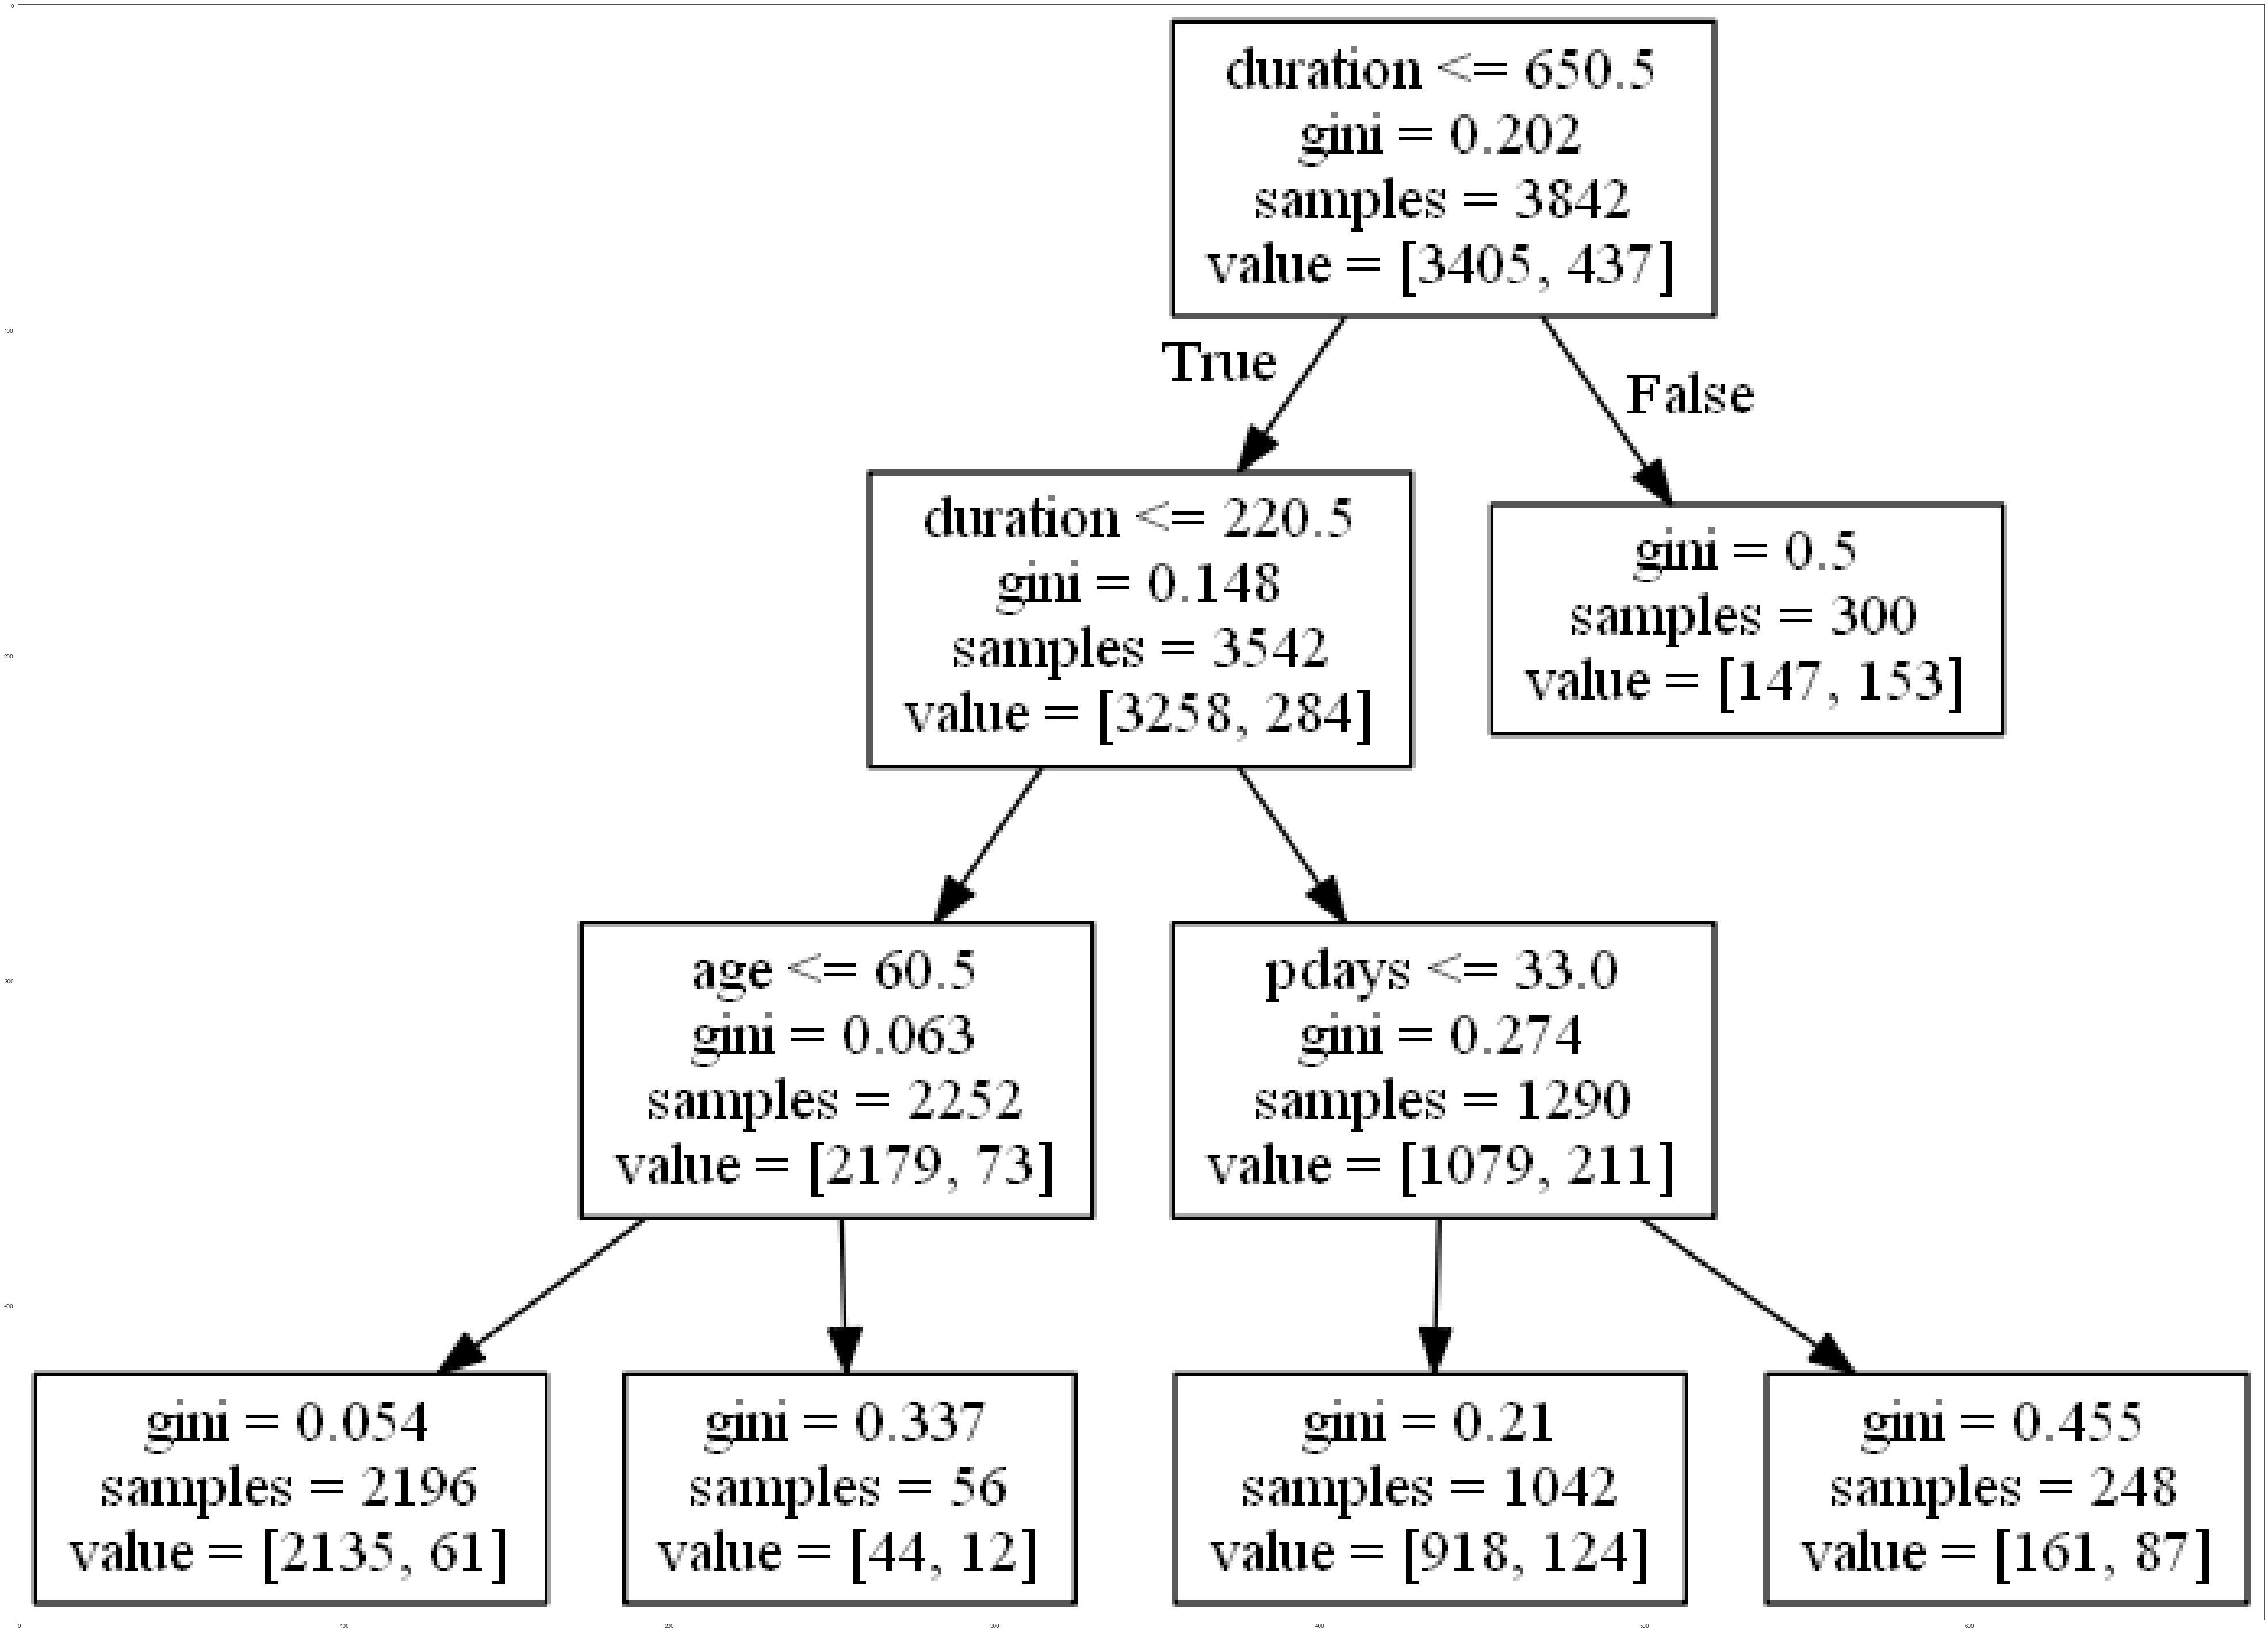

In [68]:
show_tree(dt,features,"image1.png")

In [69]:
y_pred=c.predict(X_test)

In [70]:
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'n

In [71]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)*100
print("precision ", round(score,1),"%")

precision  86.9 %


In [73]:
dataReel= pd.read_excel("bank-full.xlsx")


In [74]:
features=["age","balance","day","duration","campaign","pdays","previous"]

X_testReel= dataReel[features]
y_testReel= dataReel["y"]
y_predReel=c.predict(X_testReel)

In [75]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_testReel,y_predReel)*100
print("precision ", round(score,1),"%")

precision  88.5 %


In [76]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.95      0.93       595
         yes       0.45      0.26      0.33        84

    accuracy                           0.87       679
   macro avg       0.68      0.61      0.63       679
weighted avg       0.85      0.87      0.85       679

